In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv('./EcommerceCustomers.csv')

In [21]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [17]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [23]:
# my predictor variables are Avg session length , Time on app, TIme on website, length of membership
# i need to check correleation between all these predictor variables to check for multi colliniearity 


In [49]:
predictor_columns = df.columns[3:len(df.columns) - 1]

In [51]:
predictor_columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

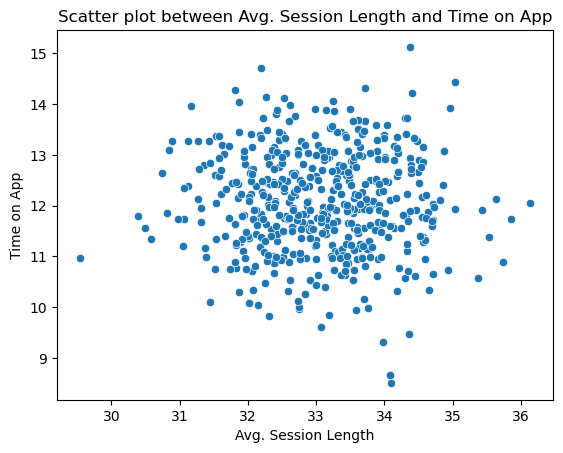

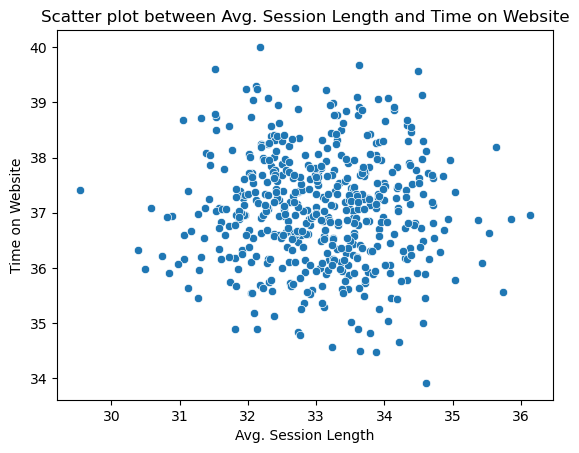

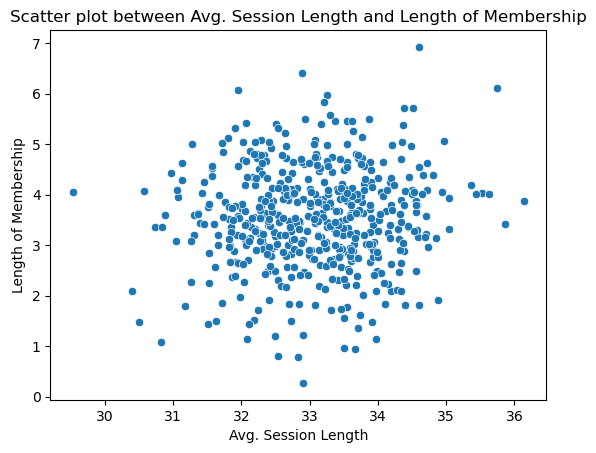

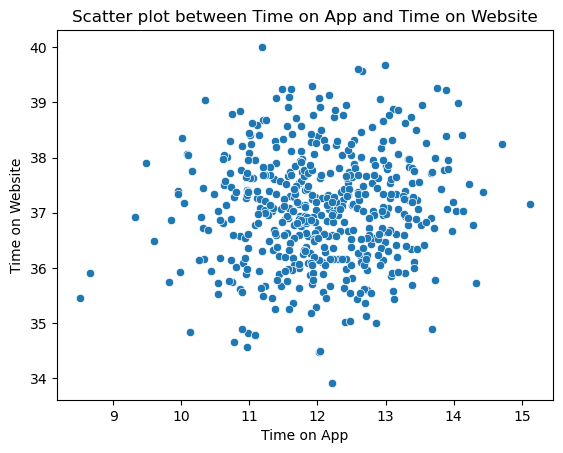

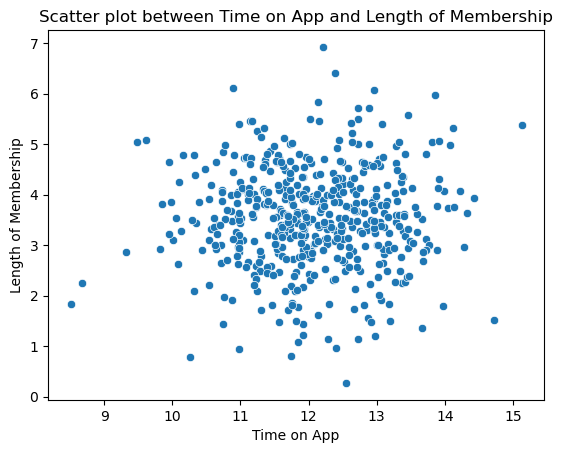

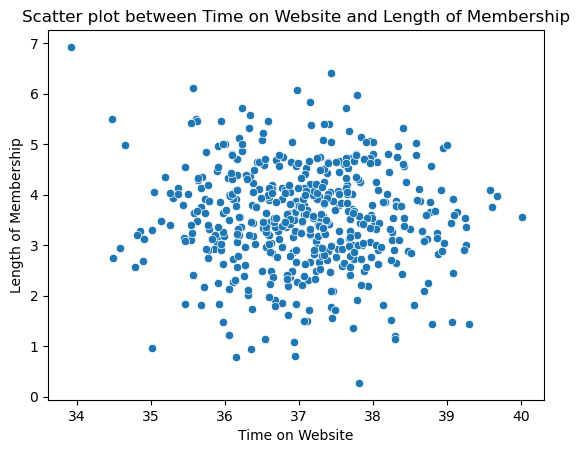

In [65]:
# sns.scatterplot(x='col1', y='col2', data=df)
# plt.title('Scatter plot between col1 and col2')
# plt.show()
for i in range(len(predictor_columns)):
    for j in range(i + 1, len(predictor_columns)):
        sns.scatterplot(x=predictor_columns[i], y=predictor_columns[j], data=df)
        plt.title(f'Scatter plot between {predictor_columns[i]} and {predictor_columns[j]}')
        plt.show()


In [69]:
for i in range(len(predictor_columns)):
    for j in range(i + 1, len(predictor_columns)):
        correlation = df[predictor_columns[i]].corr(df[predictor_columns[j]])
        print(f'The correlation between {predictor_columns[i]} and {predictor_columns[j]} is: {correlation}')


The correlation between Avg. Session Length and Time on App is: -0.027825983555661776
The correlation between Avg. Session Length and Time on Website is: -0.03498689962457982
The correlation between Avg. Session Length and Length of Membership is: 0.06024738825957971
The correlation between Time on App and Time on Website is: 0.08238827319098194
The correlation between Time on App and Length of Membership is: 0.029142563136158536
The correlation between Time on Website and Length of Membership is: -0.04758181883946145


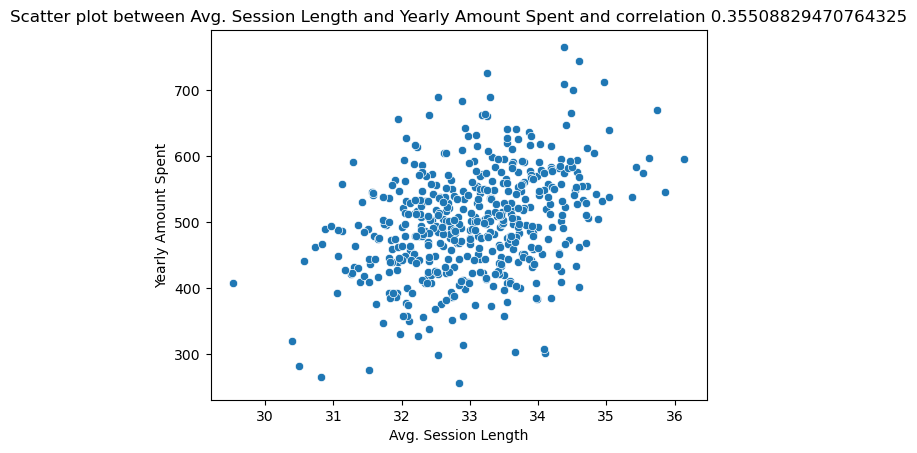

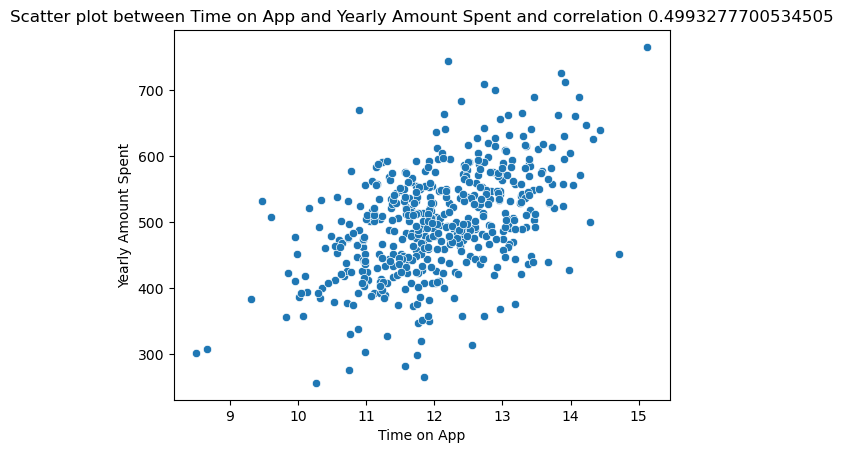

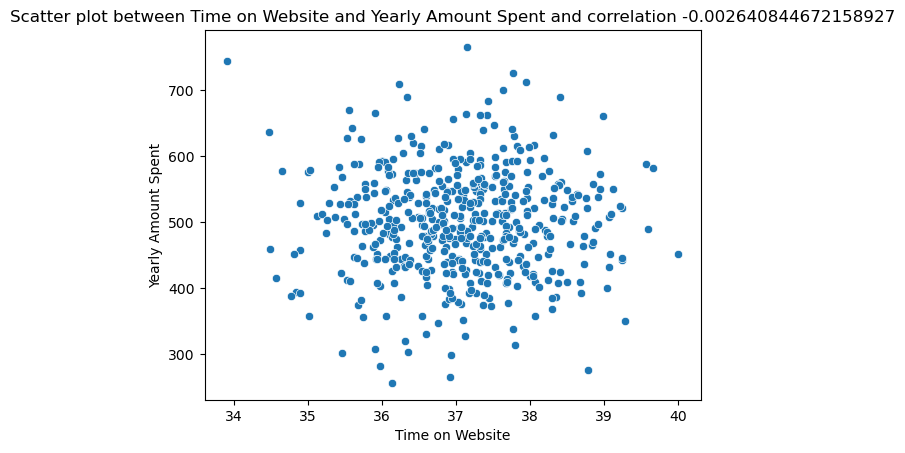

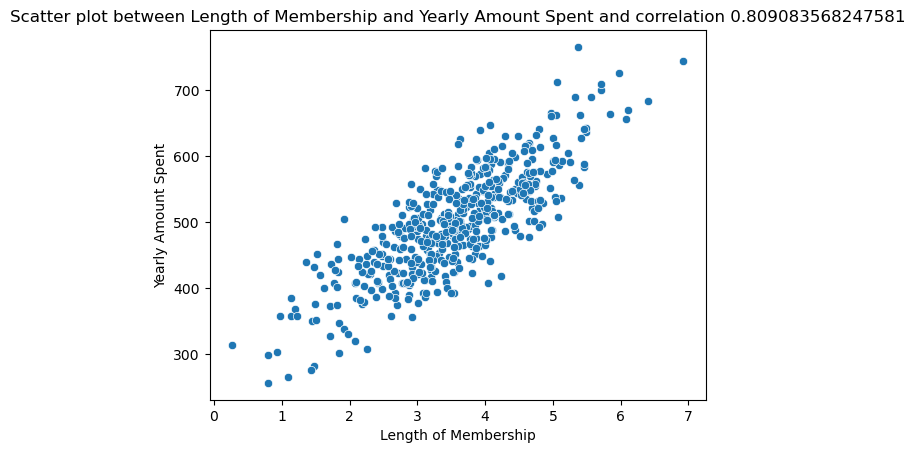

In [71]:
# the correlation values are very close to 0 so there is not risk of multicolliniearity 
for i in range(len(predictor_columns)):
        sns.scatterplot(x=predictor_columns[i], y=df.columns[-1], data=df)
        correlation = df[predictor_columns[i]].corr(df[df.columns[-1]])
        plt.title(f'Scatter plot between {predictor_columns[i]} and {df.columns[-1]} and correlation {correlation}')
        plt.show()


In [151]:
# corr values 0.8... indicates strong relationship 
# corr value of 0.499 indicates moderate relationship 
# corr value of 0.3 weak relationship i will evaluate its impact on the model and then decide it to inlcude it or not
# corre value of 0.002 represents no relationship so 
from sklearn.model_selection import train_test_split

# Assuming X is your predictors and y is your target variable
# predictor_columns.remove('Time on Website')
X = df[predictor_columns]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(predictor_columns)

['Avg. Session Length', 'Time on App', 'Length of Membership']


In [153]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [157]:
import math
import numpy as np

# Convert y_train to a list
y_train_list = y_train.to_list()

# Calculate the mean of y_train
y_train_mean = np.mean(y_train_list)

# Predict the values for the training set
test_predicted_values = model.predict(X_train)

# Initialize sums
total_sum_of_squares = 0.0
residual_sum_of_squares = 0.0

# Calculate Total Sum of Squares (SST)
for i in range(len(y_train_list)):
    total_sum_of_squares += (y_train_list[i] - y_train_mean) ** 2

# Calculate Residual Sum of Squares (SSE)
for i in range(len(y_train_list)):
    residual_sum_of_squares += (y_train_list[i] - test_predicted_values[i]) ** 2

# Calculate R-squared
r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)

print(f'R-squared value for regression: {r_squared * 100:.2f}%')





R-squared value for regression: 98.54%


In [159]:
# calculating r squared predicted 
import math
import numpy as np

# Convert y_train to a list
y_train_list = y_test.to_list()

# Calculate the mean of y_train
y_train_mean = np.mean(y_train_list)

# Predict the values for the training set
test_predicted_values = model.predict(X_test)

# Initialize sums
total_sum_of_squares = 0.0
residual_sum_of_squares = 0.0

# Calculate Total Sum of Squares (SST)
for i in range(len(y_train_list)):
    total_sum_of_squares += (y_train_list[i] - y_train_mean) ** 2

# Calculate Residual Sum of Squares (SSE)
for i in range(len(y_train_list)):
    residual_sum_of_squares += (y_train_list[i] - test_predicted_values[i]) ** 2

# Calculate R-squared
r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)

print(f'R-squared value for regression: {r_squared * 100:.2f}%')

R-squared value for regression: 98.09%


<Axes: ylabel='Yearly Amount Spent'>

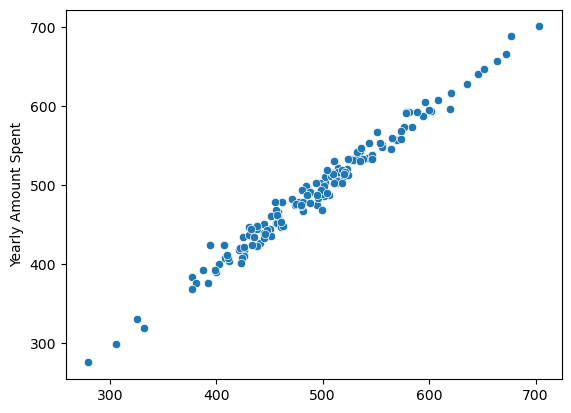

In [163]:
# there is no significant drop in r squared predicted so the model is doing well on unseen data 
#visual check on the performance of the model 
sns.scatterplot(x = test_predicted_values , y = y_test)

In [169]:
#significant linear relationship so the model is working well 
# now we will be checking our assumption with out residual plot with the x 
n = 350  # Number of data points
bins_sturges = int(np.ceil(np.log2(n) + 1))
training_model_predictions = model.predict(X_train)
residuals = y_train - training_model_predictions

C:\Users\karim\AppData\Local\Temp\ipykernel_11700\1253168110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins_sturges, kde = True)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

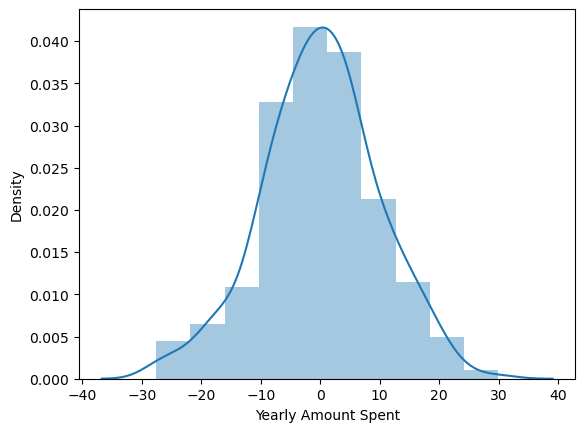

In [179]:
sns.distplot(residuals, bins_sturges, kde = True)

In [ ]:
#the distribution close to a normal distribution so the assumption is not violated